In [320]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
def find_barycenter(adj_matrix):
    n = len(adj_matrix)  # Number of nodes, number of rows
    degrees = np.sum(adj_matrix, axis=1)  # sum of row = degree
    nodes = set(range(n))  # all vertex
    
    while len(nodes) > 2: 
        leaf_nodes = [i for i in nodes if degrees[i] == 1]  # only those with a single 1 is a leaf
        
        for leaf in leaf_nodes:
            nodes.remove(leaf)  # Remove the leaf 
            degrees[leaf] = 0  # degree is then 0

            for neighbor in range(n):  # this is where we change the adjacency_matrix
                if adj_matrix[leaf][neighbor] == 1:  # Check if there is a connection
                    degrees[neighbor] -= 1 #deg of neighbor is -1
                    adj_matrix[leaf][neighbor] = 0  # change the 1 onto 0
                    adj_matrix[neighbor][leaf] = 0   # change also its "transpose position" into 0

    remaining_nodes = list(nodes)  # should only have 2 or 1 vertex

    if len(remaining_nodes) == 1:  # If only 1 vertex
        print(f"Barycenter is the vertex {remaining_nodes[0]}")
        return remaining_nodes , adj_matrix
    elif len(remaining_nodes) == 2:  # If only 2 vertex
        print(f"Barycenter is the edge that connects {remaining_nodes[0]} and {remaining_nodes[1]}")
        return remaining_nodes, adj_matrix



In [321]:
def draw_graph_from_adjacency_matrix(adjacency_matrix):
    G = nx.Graph()

    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix[i])):
            if adjacency_matrix[i][j] != 0: 
                G.add_edge(i, j, weight=adjacency_matrix[i][j])


    G.add_nodes_from(range(len(adjacency_matrix)))

    pos = nx.spring_layout(G, seed=42)

    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color='lightblue',
        edge_color='black',
        node_size=10,
        font_size=10,
        width=0.5
    )
    plt.title("Graph from Adjacency Matrix")
    plt.show()

In [322]:
from uniform_attachment_model  import matrix_uniform_attachment
matrix = matrix_uniform_attachment(9)

In [323]:
matrix

[[0, 1, 0, 1, 1, 0, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0]]

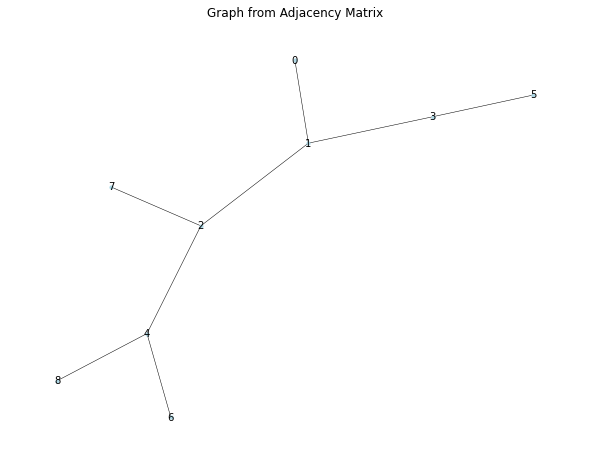

In [18]:
draw_graph_from_adjacency_matrix(matrix)

In [19]:
len(matrix)

9

In [20]:
data = list(set(range(len(matrix))))

In [28]:
list_of_stuff = list(np.random.choice(data, size=3, replace=False))
list_of_stuff.astype()

AttributeError: 'list' object has no attribute 'astype'

In [22]:
matrix

[[0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0]]

In [324]:
vertexes_to_avoid = [0,4,7]
def find_barycenter(adj_matrix):
    n = len(adj_matrix)  # Number of nodes, number of rows
    degrees = np.sum(adj_matrix, axis=1)  # sum of row = degree
    nodes = set(range(n))  # all vertex
    
    while len(nodes) > 2: 
        leaf_nodes = [i for i in nodes if degrees[i] == 1]  # only those with a single 1 is a leaf
        
        for leaf in leaf_nodes:
            nodes.remove(leaf)  # Remove the leaf 
            degrees[leaf] = 0  # degree is then 0

            for neighbor in range(n):  # this is where we change the adjacency_matrix
                if adj_matrix[leaf][neighbor] == 1:  # Check if there is a connection
                    degrees[neighbor] -= 1 #deg of neighbor is -1
                    adj_matrix[leaf][neighbor] = 0  # change the 1 onto 0
                    adj_matrix[neighbor][leaf] = 0   # change also its "transpose position" into 0

    remaining_nodes = list(nodes)  # should only have 2 or 1 vertex

    if len(remaining_nodes) == 1:  # If only 1 vertex
        print(f"Barycenter is the vertex {remaining_nodes[0]}")
        return remaining_nodes , adj_matrix
    elif len(remaining_nodes) == 2:  # If only 2 vertex
        print(f"Barycenter is the edge that connects {remaining_nodes[0]} and {remaining_nodes[1]}")
        return remaining_nodes, adj_matrix




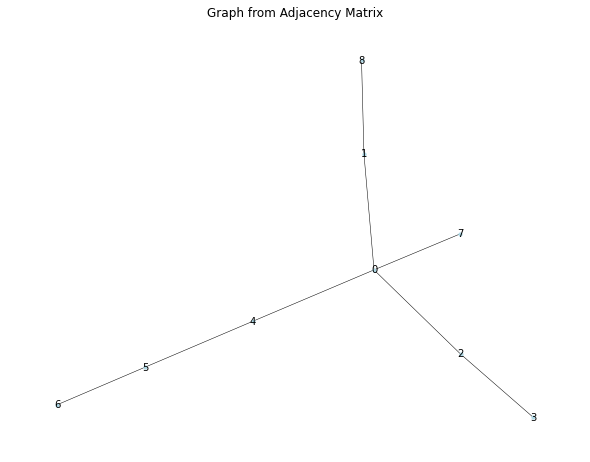

[3, 6, 8]
[1, 2, 5]
[7]
Barycenter is the edge that connects 0 and 4


In [51]:
matrix = matrix_uniform_attachment(9)
draw_graph_from_adjacency_matrix(matrix)
vertexes_to_avoid = [0,4,7]
sd, adj = find_barycenter(matrix, vertexes_to_avoid)

In [48]:
vertexes_to_avoid = [0,4,7]
leaf_nodes = [0,1,3,7]

for i in leaf_nodes:
    for j in vertexes_to_avoid:
        if i==j:
            leaf_nodes.remove(i)
leaf_nodes

[1, 3]

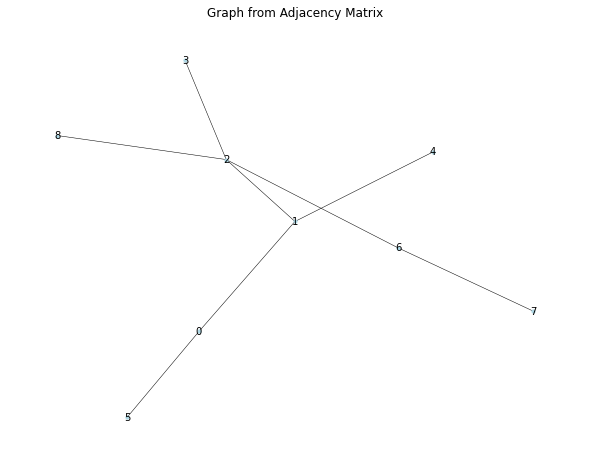

In [97]:
matrix = matrix_uniform_attachment(9)
draw_graph_from_adjacency_matrix(matrix)

In [98]:
matrix

[[0, 1, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0]]

In [99]:
vertex_to_remove = [1,5,7]

In [100]:
s= 0 
column = []
row = []
for i in matrix:
    if sum(i) == 1:
        if s in vertex_to_remove:
            pass
        if s not in vertex_to_remove:
            d = 0
            for v in i:
                if v==1:
                    row.append(s)
                    column.append(d)
                d+=1
                    

    s+=1



In [101]:
column

[2, 1, 2]

In [102]:
row

[3, 4, 8]

In [325]:
def make_that_1_into_0_with_transpose(matrix, row, column):
    matrix[row][column] = 0
    matrix[column][row] = 0


    return matrix

In [326]:
for row, column in zip(row, column):
    matrix = make_that_1_into_0_with_transpose(matrix, row, column)

In [327]:
matrix

[[0, 1, 0, 1, 1, 0, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0]]

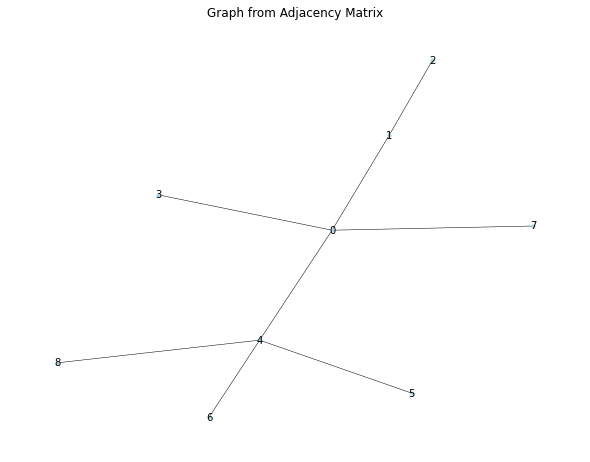

In [328]:
draw_graph_from_adjacency_matrix(matrix)

In [329]:
s= 0 
column = []
row = []
for i in matrix:
    if sum(i) == 1:
        if s in vertex_to_remove:
            pass
        if s not in vertex_to_remove:
            d = 0
            for v in i:
                if v==1:
                    row.append(s)
                    column.append(d)
                d+=1
                    

    s+=1


In [330]:
column

[1, 0, 4, 0, 4]

In [331]:
row

[2, 3, 6, 7, 8]

In [332]:
for row, column in zip(row, column):
    matrix = make_that_1_into_0_with_transpose(matrix, row, column)

In [333]:
matrix

[[0, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

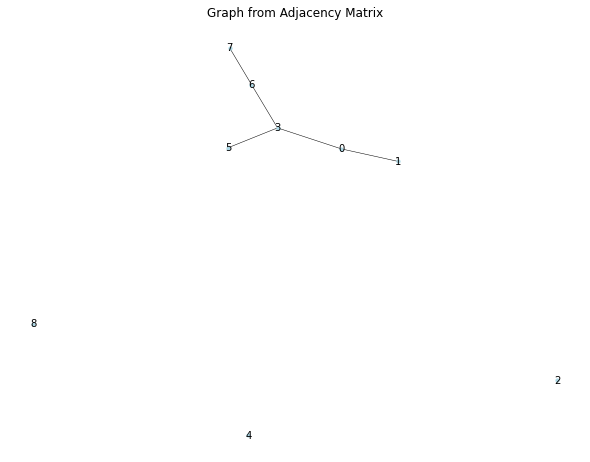

In [88]:
draw_graph_from_adjacency_matrix(matrix)

In [94]:
interested_vertex = []
s = 0
for i in matrix:
    if sum(i) == 3:
        interested_vertex.append(s)

    s+=1

In [95]:
interested_vertex

[]

In [334]:
def row_colum_returner(matrix, vertex_to_remove):
    s= 0 
    column = []
    row = []
    for i in matrix:
        if sum(i) == 1:
            if s in vertex_to_remove:
                pass
            if s not in vertex_to_remove:
                d = 0
                for v in i:
                    if v==1:
                        row.append(s)
                        column.append(d)
                    d+=1
                        
    
        s+=1

    return row, column


In [111]:
matrix = matrix_uniform_attachment(9)

In [117]:
row, column = row_colum_returner(matrix, vertex_to_remove)

In [118]:
column

[0, 4, 4]

In [119]:
row

[2, 6, 8]

In [120]:
for row, column in zip(row, column):
    matrix = make_that_1_into_0_with_transpose(matrix, row, column)

In [121]:
row, column = row_colum_returner(matrix, vertex_to_remove)

In [122]:
row

[]

In [123]:
column

[]

In [126]:
if len(row) == 0:
    print(3)

3


In [133]:
matrix = matrix_uniform_attachment(9)
vertex_to_remove = [1,5,7]

In [135]:
vertex_to_remove = [1,5,7]

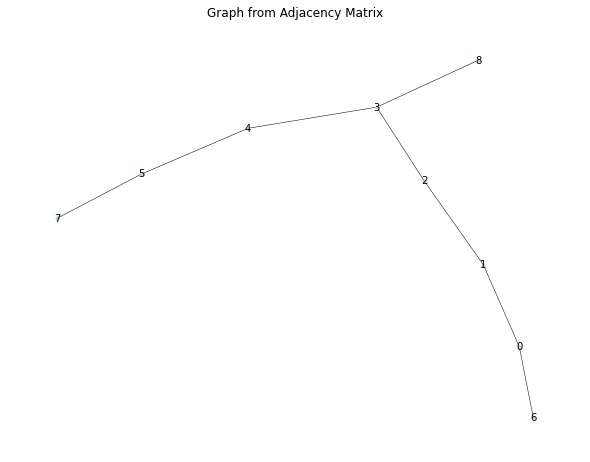

In [134]:
draw_graph_from_adjacency_matrix(matrix)

In [136]:
row_c = [0,1]
while len(row_c) != 0:
    row, column = row_colum_returner(matrix, vertex_to_remove)
    row_c = row

    if len(row_c) == 0:
        break
    
    for row, column in zip(row, column):
        matrix = make_that_1_into_0_with_transpose(matrix, row, column)


In [137]:
matrix

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

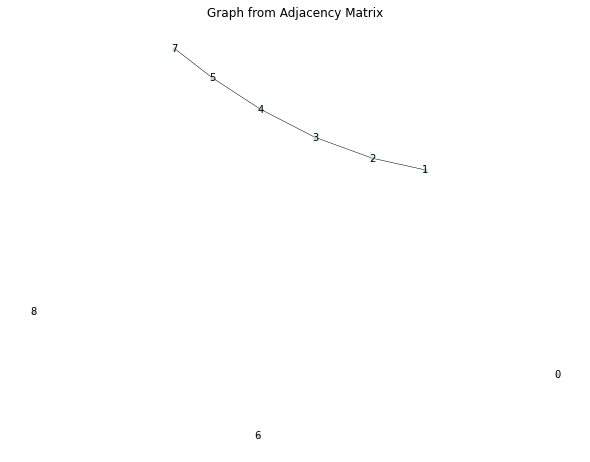

In [138]:
draw_graph_from_adjacency_matrix(matrix)

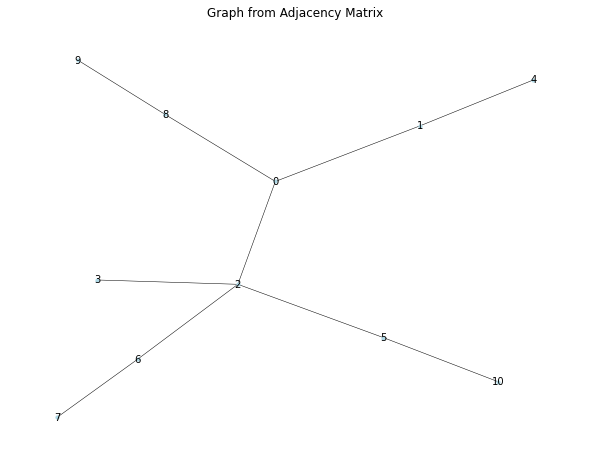

In [278]:
matrix = matrix_uniform_attachment(11)
vertex_to_remove = [1,5,10]
draw_graph_from_adjacency_matrix(matrix)

In [279]:
row_c = [0,1]

for i in vertex_to_remove:
    if vertex_to_remove.count(i) >=2:
        value = i
        print(f'Barycenter is {value}')

while len(row_c) != 0:
    row, column = row_colum_returner(matrix, vertex_to_remove)
    row_c = row

    if len(row_c) == 0:
        break
    
    for row, column in zip(row, column):
        matrix = make_that_1_into_0_with_transpose(matrix, row, column)

barycenter_found = False  #general case
s = 0
for i in matrix:
    if sum(i) == 3:
        print(f'Barycenter is {s}')
        Barycenter = s
        barycenter_found = True

    s+=1


if not barycenter_found: #line case
    for i in vertex_to_remove:
        if sum(matrix[i]) == 2:
            print(f'Barycenter is {i}')
            Barycenter = i
            barycenter_found = True
    

Barycenter is 5


In [280]:
bary = find_barycenter(matrix, vertex_to_remove)
print(bary)

5


In [ ]:
def make_that_1_into_0_with_transpose(matrix, row, column):
    matrix[row][column] = 0
    matrix[column][row] = 0


    return matrix

In [377]:
def find_barycenter_prob(matrix, vertex_to_remove):

    matrix_copy = copy.deepcopy(matrix)

    row_c = [0, 1]

    for i in vertex_to_remove:
        if vertex_to_remove.count(i) >= 2:
            return i  

    while len(row_c) != 0:
        row, column = row_colum_returner(matrix_copy, vertex_to_remove)
        row_c = row

        if len(row_c) == 0:
            break

        for r, c in zip(row, column):
            matrix_copy = make_that_1_into_0_with_transpose(matrix_copy, r, c)

 
    for s, i in enumerate(matrix_copy):
        if sum(i) == 3:
            return s  #

    for i in vertex_to_remove:
        if sum(matrix_copy[i]) == 2:
            return i  

 
    return None


In [353]:
vertex_to_remove = [1,1,7]
for i in vertex_to_remove:
    if vertex_to_remove.count(i) >=2:
        value = i
print(value)

1


In [354]:
matrix = matrix_uniform_attachment(13)



In [355]:
row_count = max(len(i) for i in matrix)

In [356]:
u_new = [0] * row_count

In [357]:
u_old = [1/row_count] * row_count

In [358]:
for i in range(0, row_count):
    for j in range(0,row_count):
        for k in range(0, row_count):
            center = find_barycenter(matrix, vertex_to_remove=[i,j,k])
            u_new[center] += u_old[i] * u_old[j] * u_old[k]

print(u_new)

[0.04688211197086935, 0.232589895311788, 0.016841147018661812, 0.43741465634956594, 0.04688211197086935, 0.0714610832954027, 0.016841147018661812, 0.016841147018661812, 0.016841147018661812, 0.04688211197086935, 0.016841147018661812, 0.016841147018661812, 0.016841147018661812]


In [361]:
find_barycenter(matrix)

TypeError: find_barycenter() missing 1 required positional argument: 'vertex_to_remove'

In [1]:

def find_barycenter_deterministic(adj_matrix):
    
    adj_matrix_copy = copy.deepcopy(adj_matrix)
    
    n = len(adj_matrix_copy)  # Number of nodes, number of rows
    degrees = np.sum(adj_matrix_copy, axis=1)  # Sum of row = degree
    nodes = set(range(n))  # All vertices
    
    while len(nodes) > 2: 
        # Find all leaf nodes (nodes with degree 1)
        leaf_nodes = [i for i in nodes if degrees[i] == 1]  # Only those with a single 1 are leaves
        
        for leaf in leaf_nodes:
            nodes.remove(leaf)  # Remove the leaf
            degrees[leaf] = 0  # Degree is then 0

            for neighbor in range(n):  # Check all neighbors
                if adj_matrix_copy[leaf][neighbor] == 1:  # If there is a connection
                    degrees[neighbor] -= 1  # Decrement the degree of the neighbor
                    adj_matrix_copy[leaf][neighbor] = 0  # Change the 1 to 0
                    adj_matrix_copy[neighbor][leaf] = 0  # Also change its "transpose position" to 0

    # At this point, there should only be 1 or 2 nodes left
    remaining_nodes = list(nodes)  # Convert the set to a list

    if len(remaining_nodes) == 1:  # If only 1 vertex remains
        return remaining_nodes, adj_matrix_copy
    elif len(remaining_nodes) == 2:  # If 2 vertices remain
        return remaining_nodes, adj_matrix_copy


In [365]:
rn, ma = find_barycenter_deterministic(matrix)

In [366]:
rn

[3]

In [3]:
def calculate_u_new(matrix):
    row_count = max(len(i) for i in matrix)
    u_new = [0] * row_count
    u_old = [1 / row_count] * row_count
    
    for i in range(0, row_count):
        for j in range(0, row_count):
            for k in range(0, row_count):
                center = find_barycenter(matrix, vertex_to_remove=[i, j, k])
                u_new[center] += u_old[i] * u_old[j] * u_old[k]
    
    return u_new

In [4]:
u_new = calculate_u_new(matrix)

NameError: name 'matrix' is not defined

In [374]:
max_index = u_new.index(max(u_new))

In [375]:
max_index

3

In [2]:
def find_barycenter_prob(matrix, vertex_to_remove):

    matrix_copy = copy.deepcopy(matrix)

    row_c = [0, 1]

    for i in vertex_to_remove:
        if vertex_to_remove.count(i) >= 2:
            return i  

    while len(row_c) != 0:
        row, column = row_colum_returner(matrix_copy, vertex_to_remove)
        row_c = row

        if len(row_c) == 0:
            break

        for r, c in zip(row, column):
            matrix_copy = make_that_1_into_0_with_transpose(matrix_copy, r, c)

 
    for s, i in enumerate(matrix_copy):
        if sum(i) == 3:
            return s  #

    for i in vertex_to_remove:
        if sum(matrix_copy[i]) == 2:
            return i  

 
    return None


# 